<a href="https://colab.research.google.com/github/aflores/my-binder-notebooks/blob/main/ch03-highlights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 
# Notes from Chapter 3 - Linear Regression and Beyond
#
# 
#
#

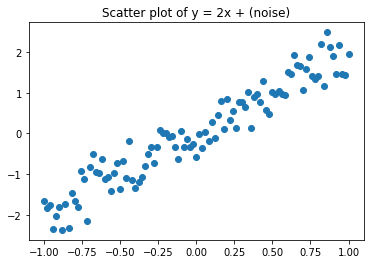

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.title("Scatter plot of y = 2x + (noise)")
plt.scatter(x_train, y_train)
plt.show()


# Linear Regression

Find the value of 'w' such that the cost function is minimal

In [26]:
learning_rate = 0.01
training_epochs = 100

In [27]:
X = tf.constant(x_train, dtype=tf.float32)
Y = tf.constant(y_train, dtype=tf.float32)
w = tf.Variable(0., name="weights", dtype=tf.float32)

cost = lambda: tf.square(Y - tf.multiply(X, w))

In [28]:
train_op = tf.keras.optimizers.SGD(learning_rate)

for _ in range(training_epochs):
    step_count = train_op.minimize(cost, w)
    # print(w.numpy())

In [29]:
val1 = w.value()
print("Prediction: {}".format(val1))

Prediction: 1.9913421869277954


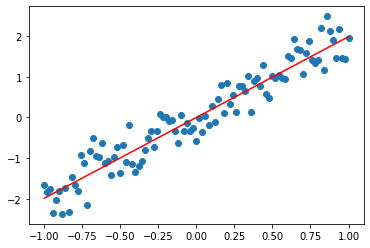

In [30]:
plt.scatter(x_train, y_train)

# plot the line with based on the predicted value of w
y_learned = x_train * val1

plt.plot(x_train, y_learned, 'r')
plt.show()

# Polinomial Model

In [31]:
learning_rate = 0.0085

# "momentum" accelerates gradient descent in the 
# relevant direction and dampens oscillations.
# Used for the Keras gradient descent implementation
momentum = 0.5
training_epochs = 40

In [68]:
trX = np.linspace(-1, 1, 101)
iterations = 0
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0

In [69]:
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
trY += np.random.randn(*trX.shape) * 1.5

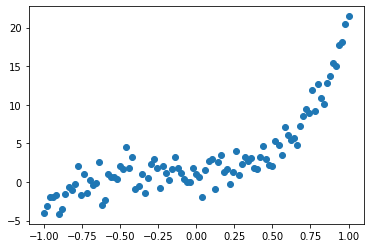

In [70]:
plt.scatter(trX, trY)
plt.show()

In [71]:
X = tf.constant(trX, dtype=tf.float32)
Y = tf.constant(trY, dtype=tf.float32)
w = tf.Variable([0.] * num_coeffs, name='parameters')

In [72]:
model = lambda _X, _w: tf.add_n([tf.multiply(_w[i], tf.pow(_X, i)) for i in range(num_coeffs)])
y_model = lambda: model(X, w)
cost = lambda: tf.pow(Y - y_model(), 2)

In [73]:
train_op = tf.keras.optimizers.SGD(learning_rate, momentum=momentum)

In [74]:
for _ in range(training_epochs):
    step = train_op.minimize(cost, w)
w_val = w.value()

print("Weights after training: \n")
print(w_val.numpy())

Weights after training: 

[1.2010685 1.3341976 3.6791415 5.5254703 3.6531122 5.6348143]


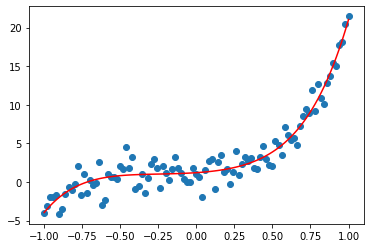

In [75]:
plt.scatter(trX, trY)
trY2 = 0

for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
    
plt.plot(trX, trY2, 'r')
plt.show()